In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [18]:
IMGS_PATH = "../Images/7/images/"
MASKS_PATH = "../Images/7/masks/"

def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    plt.figure(figsize=(50, 50))
    plt.imshow(labeled_img)
    plt.show()

def find_extremes(img):
    north = [0, 0]
    south = [0, 0]
    east =[0, 0]
    west = [0, 0]
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if img[y][x] == True:
                if north == [0,0] or west == [0,0]:
                    north = [y,x]
                    west = [y,x]
                if y < north[0]:
                    north = [y,x]
                if x > east[1]:
                    east = [y,x]
                if y > south[0]:
                    south = [y,x]
                if x < west[1]:
                    west = [y,x]
    return north, south, east, west
                    
def draw_box(img, north, south, east, west):
    cv2.line(img, (west[1], south[0]), (east[1], south[0]), (255, 0, 0), 5, 1)
    cv2.line(img, (west[1], north[0]), (east[1], north[0]), (255, 0, 0), 5, 1)
    cv2.line(img, (west[1], south[0]), (west[1], north[0]), (255, 0, 0), 5, 1)
    cv2.line(img, (east[1], north[0]), (east[1], south[0]), (255, 0, 0), 5, 1)
    plt.figure(figsize=(50, 50))
    plt.imshow(img)
    plt.show()

def get_image_pair(img_name):
    image_path = os.path.join(IMGS_PATH, img_name)
    mask_path = os.path.join(MASKS_PATH, img_name)
    image = cv2.imread(image_path,1)  
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mask = cv2.imread(mask_path,0)
    return image, mask


(4608, 3456, 3)


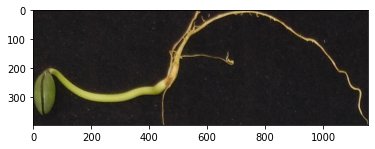

KeyboardInterrupt: 

In [19]:


image_names = os.listdir(IMGS_PATH)

for image_name in image_names:
    image, mask = get_image_pair(image_name)
    print(image.shape)
    num_components, components = cv2.connectedComponents(mask, connectivity=8)
    
    for component_idx in range(1, len(components) - 1):
        component = components[:,:] == component_idx
        north, south, east, west = find_extremes(component)
    #     draw_box(img, north, south, east, west)
        plt.imshow(image[north[0]:south[0], west[1]:east[1]])
        plt.show()
